        station_id     capacity  num_bikes_available  num_docks_available  \
count  1000.000000  1000.000000          1000.000000          1000.000000   
mean    264.862000    25.539000            10.329000            15.210000   
min       1.000000     8.000000             0.000000             0.000000   
25%     124.000000    21.000000             3.000000             8.000000   
50%     263.000000    25.000000             9.000000            16.000000   
75%     406.500000    28.000000            16.000000            22.000000   
max     541.000000    54.000000            53.000000            49.000000   
std     155.143109     6.837634             8.691047             8.847156   

                       last_reported  
count                           1000  
mean   2024-09-16 06:10:06.685999872  
min              2024-09-01 00:17:54  
25%    2024-09-09 06:09:42.249999872  
50%              2024-09-16 01:38:01  
75%              2024-09-23 19:23:51  
max              2024-09-30 23:09

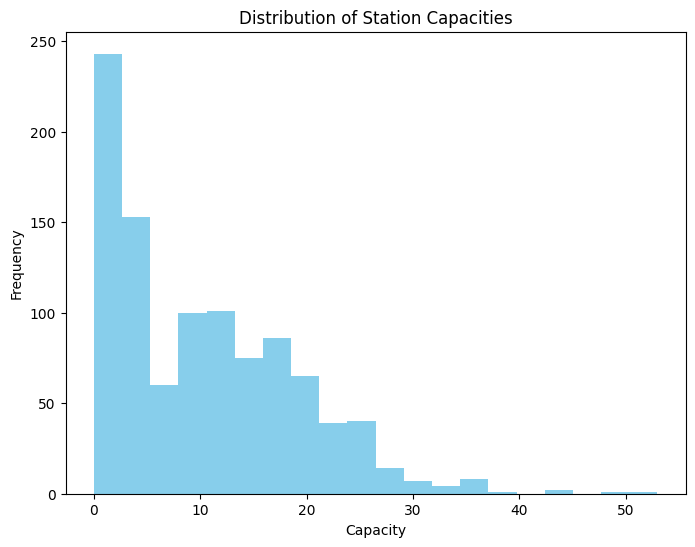

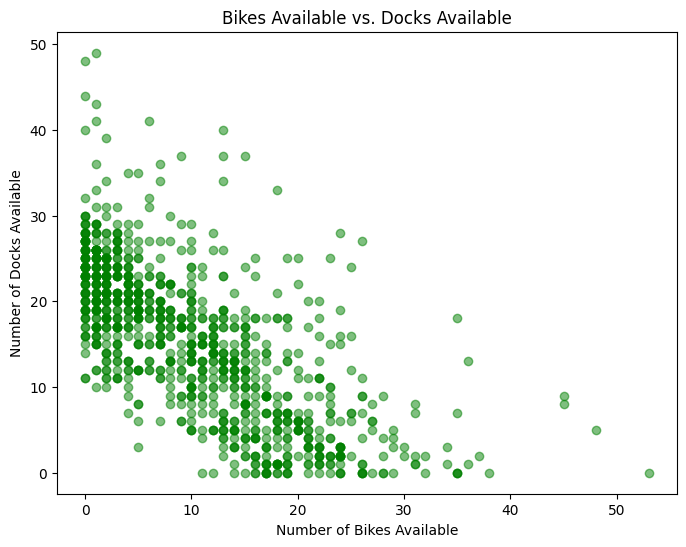

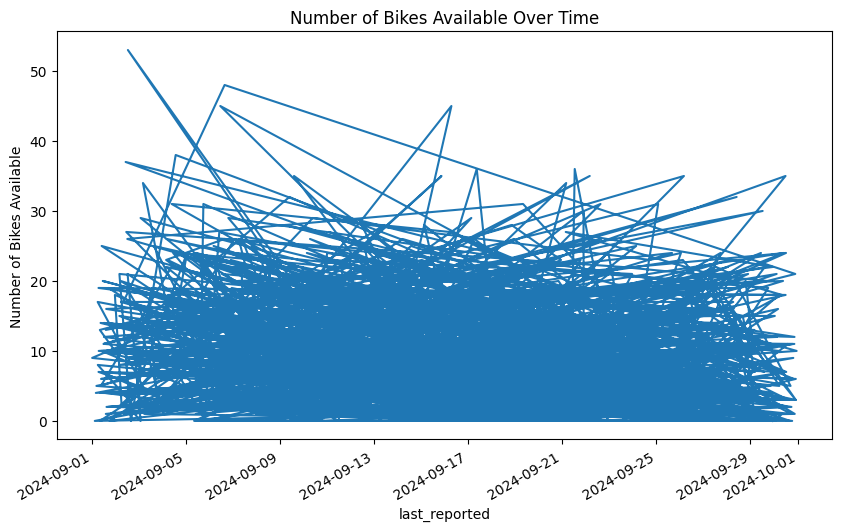

In [2]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

# MongoDB connection
client = pymongo.MongoClient("mongodb://localhost:27017/")  # Adjust connection string if needed
db = client['tfm']

# Sample data from the 'status_09' collection (adjust as needed)
# Limit to 1000 documents for faster visualization
sample_size = 1000
cursor = db['status_09'].aggregate([{"$sample": {"size": sample_size}}])

# Load data into a pandas DataFrame
data = pd.DataFrame(list(cursor))

# Convert 'last_reported' to datetime
data['last_reported'] = pd.to_datetime(data['last_reported'])

# Quick summary of the numerical columns
print(data.describe())

# Visualization examples:

# 1. Histogram of 'capacity' values
plt.figure(figsize=(8, 6))
plt.hist(data['capacity'], bins=20, color='skyblue')
plt.title('Distribution of Station Capacities')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot: 'num_bikes_available' vs 'num_docks_available'
plt.figure(figsize=(8, 6))
plt.scatter(data['num_bikes_available'], data['num_docks_available'], alpha=0.5, color='green')
plt.title('Bikes Available vs. Docks Available')
plt.xlabel('Number of Bikes Available')
plt.ylabel('Number of Docks Available')
plt.show()

# 3. Time series: number of bikes available over time
data.set_index('last_reported', inplace=True)
data['num_bikes_available'].plot(figsize=(10, 6), title='Number of Bikes Available Over Time')
plt.ylabel('Number of Bikes Available')
plt.show()
